<a href="https://colab.research.google.com/github/miguelsmachado/Aproching_any_ML_probloem/blob/main/AAMLP_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Antes de falarmos sobre Cross-validation, é muito importante entendermos o significado de `overfitting`.

Overfitting é quando um modelo se adequa perfeitamente nos dados de treino e muito mal nos dados de teste.

Para entendermos melhor o que está ocorrendo, vamos usar um data set que trata sobre a nota dos vinhos baseado em sua características.

In [60]:
import pandas as pd

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/miguelsmachado/Aproching_any_ML_probloem/main/datasets/winequality-red.csv", sep=';')

In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Vamos dar uma olhada nos valores da coluna quality:

In [64]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

Para facilitar o entendimento, vamos trocar esses 6 valores por valores de 0 a 5

In [65]:
quality_map = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.quality = df.quality.map(quality_map)

df.quality.unique()

array([2, 3, 4, 1, 5, 0])

### Separando em dados de treino e teste

1º Vamos embaralhar o dataFrame;

2º Já vamos reindexar o DataFrame:

In [66]:
# Ao usarmos o comando sample, temos que escolher quantos dados serão retornados na amostra.
# Podemos fazer isso com n= e passarmos o valor exato ou usamos o parâmetro
# frac= e passamos a fração que queremos. Como queremos o DataSet todo, vamos usar
# frac = 1

# O parâmetro drop= recebe um bool e retorna ou não o antigo índice dentro do dataframe

df = df.sample(frac=1).reset_index(drop = True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,3
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,4
2,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,1
3,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,3
4,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,2


3º Separando em X e y

In [67]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
2,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1
3,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4
4,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5


In [68]:
y = df.quality
y.head()

0    3
1    4
2    1
3    3
4    2
Name: quality, dtype: int64

4º Separando em treino e teste:

In [69]:
X_train = X.iloc[:1000]
X_test = X.iloc[1000:]

y_train = y.iloc[:1000]
y_test = y.iloc[1000:]

(2ª forma de fazer)

4º Separando em treino e teste:


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)

## Criando o classificador

In [72]:
from sklearn import tree

Inicialmente, iremos usar um Decision Tree Classifier com profundidade de 3

In [73]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Verificando as Predições

In [75]:
train_predictions = clf.predict(X_train)

test_predictions = clf.predict(X_test)

### Verificando a acurácia

In [76]:
from sklearn import metrics

Acurácia de treino

In [77]:
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
train_accuracy

0.605

Acurácia de teste

In [78]:
test_accuracy = metrics.accuracy_score(y_test, test_predictions)
test_accuracy

0.5659432387312187

### Teste variados com diferentes valores para o `maxdepth`

In [79]:
train_accuracies = [0.5]
test_accuracies = [0.5]
index_accuracies = [0]

In [80]:
for depth in range(1, 30):
  #criando o classificador
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  
  #treinando o classificador
  clf.fit(X_train, y_train)

  # realizando as predições de treino e teste
  train_predictions = clf.predict(X_train)
  test_predictions = clf.predict(X_test)

  # calculando as acurácias
  train_accuracy = metrics.accuracy_score(y_train, train_predictions)
  test_accuracy = metrics.accuracy_score(y_test, test_predictions)

  # adicionando os valores nas listas
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  index_accuracies.append(depth)


Realizando o plot:

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_palette("Dark2")
sns.set_style("darkgrid")

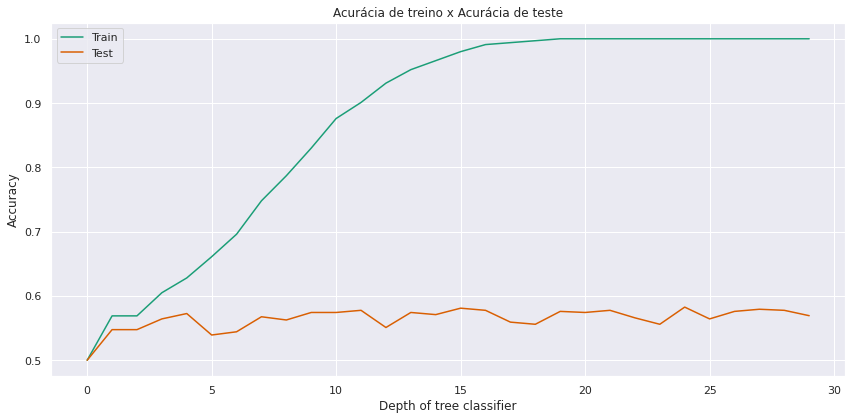

In [82]:
ax = sns.lineplot(x=index_accuracies, y=train_accuracies, label='Train')
ax = sns.lineplot(x=index_accuracies, y=test_accuracies, label='Test')

ax.figure.set_size_inches(12,6)
ax.set_title("Acurácia de treino x Acurácia de teste")
ax.set_xlabel("Depth of tree classifier")
ax.set_ylabel("Accuracy")
ax.legend()

plt.tight_layout()

Aqui podemos ver perfeitamente como a acurrácia de treino vai melhorando cada vez mais quando aumentamos a profundidade da árvore. Mas em contrapartida, a mesma otimização não ocorre nos dados de teste.

Isso é o **overfitting**

# Cross-validation

Para solucionarmos esse problema, vamos usar o cross-validation. Essa técnica divide os dados em vários grupo e aplica os treinos em testes nesses grupos.

Dessa forma, todos os dados são utilizados tanto para treino como para teste.

<center><img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" height="300px"></center>

## **Kfold** "normal"

### Criando os *folds*

Importando a biblioteca model selection

In [83]:
from sklearn import model_selection

Resetando os valores para X e y:

In [84]:
X = df.drop('quality', axis=1)
y = df.quality

In [85]:
X['kfold'] = -1
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kfold
0,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,-1
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,-1
2,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,-1
3,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,-1
4,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,-1


Fazendo a separação na proporção que queremos que o Kfold divida os dados.

Nesse caso, queremos que divida em 5 partes, sendo 4 para treino e 1 para validação

In [86]:
kf = model_selection.KFold(n_splits=5)

Atribuindo o "número do fold" que o modelo criou para entrada na coluna `kfold`

In [87]:
# a função split() irá retornar um objeto que pode ser listado (list(kf.split()))
# o kf.split() retorna os splits gerados pelo kfold, nesse caso, 5
# cada um deles terá, na primeira posicão quais entradas são de treino
# e na segunda posição quais são de teste

for fold, (trn_, val_) in enumerate(kf.split(X)):
  X.loc[val_, 'kfold'] = fold

Vamos embaralhar o dataFrame para podermos ver que os valores de 0 a 4 (os 5 splits) foram distribuídos na coluna `kfold`

In [88]:
X.sample(frac=1).head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kfold
1412,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,4
1123,11.1,0.440,0.42,2.2,0.064,14.0,19.0,0.99758,3.25,0.57,10.4,3
99,10.5,0.430,0.35,3.3,0.092,24.0,70.0,0.99798,3.21,0.69,10.5,0
1558,10.8,0.890,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2,4
1394,9.0,0.820,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,4
814,7.1,0.460,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,2
1266,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,3
1426,7.8,0.560,0.19,2.1,0.081,15.0,105.0,0.99620,3.33,0.54,9.5,4
1467,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,4
910,9.4,0.685,0.11,2.7,0.077,6.0,31.0,0.99840,3.19,0.70,10.1,2


## **Stratified Kfold**

In [89]:
from sklearn import model_selection

Resetando os valores de X e Y

In [90]:
X = df.drop('quality', axis=1)
y = df.quality

In [91]:
X['s_kfold'] = -1
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,s_kfold
0,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,-1
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,-1
2,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1,-1
3,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,-1
4,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,-1


In [92]:
s_kf = model_selection.StratifiedKFold(n_splits=5)

In [93]:
for fold, (trn_, val_) in enumerate(s_kf.split(X, y)):
  X.loc[val_, 's_kfold'] = fold

Vamos embaralhar o dataFrame para podermos ver que os valores de 0 a 4 (os 5 splits) foram distribuídos na coluna `s_kfold`

In [94]:
X.sample(frac=1).head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,s_kfold
536,6.2,0.70,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.90,1
298,8.0,0.58,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.20,0
433,10.6,0.34,0.49,3.2,0.078,20.0,78.0,0.99920,3.19,0.70,10.00,1
1006,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.30,3
1080,11.1,0.18,0.48,1.5,0.068,7.0,15.0,0.99730,3.22,0.64,10.10,3
48,6.0,0.54,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55,0
887,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.50,2
513,7.4,0.67,0.12,1.6,0.186,5.0,21.0,0.99600,3.39,0.54,9.50,1
90,7.2,0.41,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.40,0
1134,10.7,0.40,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.70,3


### Comparando os dados de y com as divisões do `Statified_kfold()`

Valores de y em cada fold

In [95]:
for i in range(5):
  dtrn_s_kfold = list(s_kf.split(X, y))[i][0]
  print(y.loc[dtrn_s_kfold].value_counts().sort_index().to_list())

[8, 43, 544, 510, 159, 15]
[8, 43, 545, 510, 159, 14]
[8, 42, 545, 510, 160, 14]
[8, 42, 545, 511, 159, 14]
[8, 42, 545, 511, 159, 15]


Valores em y

In [96]:
y.value_counts().sort_index().to_list()

[10, 53, 681, 638, 199, 18]

#### Plotando:

Os valores do dataFrame (y):

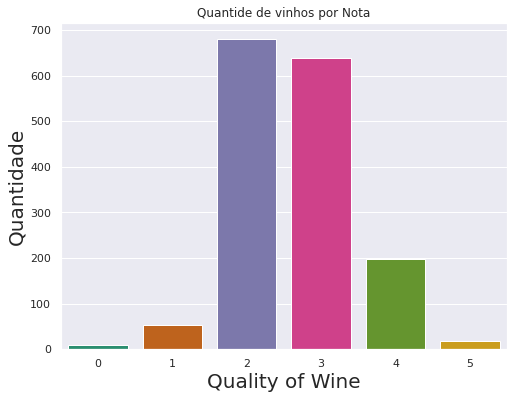

In [97]:
ax = sns.countplot(y)

ax.figure.set_size_inches(8,6)
ax.set_title('Quantide de vinhos por Nota')
ax.set_xlabel('Quality of Wine', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20);

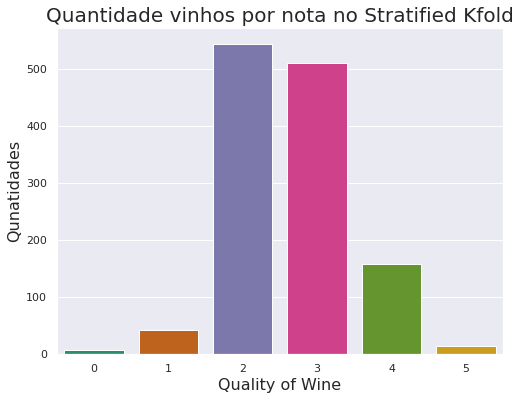

In [98]:
ax = sns.countplot(y.loc[list(s_kf.split(X, y))[0][0]])

ax.figure.set_size_inches(8,6)
ax.set_title('Quantidade vinhos por nota no Stratified Kfold', fontsize=20)
ax.set_xlabel('Quality of Wine', fontsize=16)
ax.set_ylabel('Qunatidades', fontsize=16);

Como podemos ver, o `Stratified_kfold()` separa os dados na mesma proporção que o dataframe original, o que é muito bom pois permite que sejam alcançados resultados melhores e evita que, em data set que tenham dados 90%/10% sejam pegos somente o grupo de 90% para treino

## Hold out

Esse método é muito utilizado quando temos um grande números de dados, pois ai podemos guardar (hold-out) uma parte do dados para teste

## Séries Temporais

Quando trabalhamos com séries temporais, podemos usat qualquer tipo de Crossvalidation que quiser normalmente, exceto o `Stratified_kfold()`.

Se quiser usar o `Stratified_kfold()` temos que fazer um processo diferente, que  consiste em dividir o dataset em Bins.

Para isso, podemos fazer de uma forma aletatória ou usarmos a fórmula geral para saber a quantidade de bins para cada dataset


### Exemplo

#### Criando uma série temporal

In [99]:
from sklearn import datasets

In [100]:
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

In [101]:
df = pd.DataFrame(X, columns=[f'f_{i}' for i in range(X.shape[1])])

df['target'] = y

df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target
0,1.008858,2.284810,0.817840,-1.165121,0.797652,0.238728,0.116529,1.192037,0.309803,0.342872,-0.385810,0.018683,0.285109,0.074341,0.169465,-1.869398,0.630036,0.269496,-0.928607,-0.457776,-0.733857,0.464741,-0.507720,-0.824561,-0.529614,-0.681307,-0.723927,-1.569802,-0.205045,0.572418,1.537875,1.060685,0.028801,-1.719051,-0.043473,0.657884,-0.315808,0.686687,2.424121,0.978476,...,-1.480874,1.697713,0.141858,-3.047870,-0.739223,1.107809,-0.558307,-0.765934,-1.427559,0.641801,-0.533696,0.580426,0.231759,-1.429090,-0.872654,-0.589654,-0.632985,-0.080138,-0.870840,-0.225724,-0.691976,0.066254,-1.640243,-0.073005,0.093514,-1.024896,0.528372,-0.595213,-0.854530,0.526494,0.039229,0.356891,0.312084,0.830106,0.516636,0.029569,0.218131,-0.613858,1.059819,-153.844394
1,-0.424836,-1.204355,0.990726,-1.691361,-0.470760,-0.425230,-0.722171,0.605408,-2.700422,2.032132,-0.222166,2.768601,-2.059036,0.063176,-0.594411,0.025728,0.266105,0.737032,-1.813823,-0.548713,-0.321928,1.202412,-2.423574,0.719409,-0.228544,1.157950,1.009423,-0.649892,-0.425900,0.399014,2.552479,-0.862790,-0.399365,-0.446981,2.101953,0.261636,-1.382652,-1.183960,0.965530,-0.977431,...,-1.156539,-2.273278,0.838778,1.210318,0.408962,0.531239,1.635291,-0.070851,-0.732569,-1.014164,-0.719296,0.627374,0.618823,0.841599,-0.200816,0.259595,0.543711,0.398868,-1.881387,0.159840,-0.218661,-1.922924,1.443872,-0.444387,0.042015,-1.038133,-0.382581,0.689422,1.102253,-0.456063,-0.470606,-0.446154,-0.687477,0.355566,1.474005,0.231861,0.657900,0.063595,0.394417,-138.607729
2,0.682903,1.862604,-0.529048,0.081843,-0.991939,1.619431,-0.263431,-0.030493,0.267007,-0.265248,-0.102520,-0.556463,0.343162,-0.557935,0.970376,-0.791325,-1.450562,0.177263,0.084366,0.915431,-1.198478,-0.091856,0.781257,0.197358,0.042887,1.093087,-1.303684,0.816539,-0.577282,-2.452862,-0.485766,0.739368,1.626127,-1.492544,0.636118,-0.389314,-0.672853,0.570146,0.857533,0.349283,...,1.504061,-0.855387,-1.108353,-1.256346,-0.156912,0.348855,0.431260,2.855606,-0.870414,0.279880,0.599055,0.778658,-1.220131,0.814576,1.273288,1.500666,-0.286381,-0.353544,-0.627171,-0.186709,0.965286,-0.984076,-0.668008,-0.483776,0.555024,-0.073135,0.109293,0.041288,0.896392,0.863692,-1.507522,0.136533,0.757733,1.088945,0.406436,0.309261,-1.460208,-1.033369,-0.780333,381.253012
3,-0.633509,0.491690,0.830308,-0.227263,-1.480178,-0.132106,-2.311250,-0.182068,1.031627,-0.516814,0.384579,0.777809,-0.336775,0.388959,-0.481916,-0.244291,-0.030779,-1.616129,-0.920296,-1.784803,-0.175111,0.387448,-1.001607,1.532969,0.486208,-0.757650,1.136110,0.569011,-0.991577,-1.709308,1.344883,1.845385,0.373258,-2.855987,0.897436,-0.652043,0.452555,-0.694508,-0.885058,-0.145723,...,0.210591,0.924053,0.926209,0.371759,0.836966,0.656125,-0.894514,1.704168,0.377818,-1.131469,0.576183,0.330731,0.894315,1.049757,0.955032,-1.234649,0.875601,-1.723067,0.100871,-1.161299,-0.297936,-0.061590,0.202171,0.034844,-0.051593,1.022784,-1.619743,1.358908,-0.261398,-0.736771,-1.692450,1.053211,0.266579,1.913594,-0.814718,1.166581,0.199323,0.112564,-0.176341,171.779468
4,-1.599006,1.417965,1.528813,0.392245,0.461270,-0.429333,1.166085,-0.577387,-0.507151,2.402715,-1.172462,-0.107426,0.615708,-1.044278,1.221689,-0.479070,0.877959,0.105612,-0.115208,-1.018208,-0.271581,-1.288642,0.958785,-0.871096,-0.418749,-0.490081,0.626407,-0.198943,-0.347152,-0.435184,-1.151975,0.578313,-0.886329,-0.822982,-0.226634,-0.283929,1.981604,-1.215469,-1.393400,-1.363174,...,-0.507074,0.219439,0.757542,-0.403923,1.555664,-0.238299,-0.465715,0.048703,-1.476787,0.231510,-1.585887,-0.217748,-0.814278,1.380526,-1.528244,-

#### Criando os folds

In [102]:
import pandas as pd
import numpy as np
from sklearn import model_selection

Da mesma forma que nos exemplos anteriores, vamos criar uma coluna `s_kfold` e inicia-la com o valor -1

In [103]:
df['s_kfold'] = -1

##### Calculando e separando os bins

Usando a fórmula geral para calcular o número apropriado de bins

In [104]:
num_bins = np.floor(1 + np.log2(len(df)))

num_bins

14.0

Redefinindo o DataFrame com a separação por bins usando o método `cut()`

In [105]:
# Ao usar labels=False o metodo cut devolve um inteiro que representa cada classe
# Caso não fosse passado nada, os valores seriam os intervalos que se encontram aquela entrada
df['classe'] = pd.cut(df.target, bins=int(num_bins), labels=False)

df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,s_kfold,classe
0,1.008858,2.284810,0.817840,-1.165121,0.797652,0.238728,0.116529,1.192037,0.309803,0.342872,-0.385810,0.018683,0.285109,0.074341,0.169465,-1.869398,0.630036,0.269496,-0.928607,-0.457776,-0.733857,0.464741,-0.507720,-0.824561,-0.529614,-0.681307,-0.723927,-1.569802,-0.205045,0.572418,1.537875,1.060685,0.028801,-1.719051,-0.043473,0.657884,-0.315808,0.686687,2.424121,0.978476,...,0.141858,-3.047870,-0.739223,1.107809,-0.558307,-0.765934,-1.427559,0.641801,-0.533696,0.580426,0.231759,-1.429090,-0.872654,-0.589654,-0.632985,-0.080138,-0.870840,-0.225724,-0.691976,0.066254,-1.640243,-0.073005,0.093514,-1.024896,0.528372,-0.595213,-0.854530,0.526494,0.039229,0.356891,0.312084,0.830106,0.516636,0.029569,0.218131,-0.613858,1.059819,-153.844394,-1,5
1,-0.424836,-1.204355,0.990726,-1.691361,-0.470760,-0.425230,-0.722171,0.605408,-2.700422,2.032132,-0.222166,2.768601,-2.059036,0.063176,-0.594411,0.025728,0.266105,0.737032,-1.813823,-0.548713,-0.321928,1.202412,-2.423574,0.719409,-0.228544,1.157950,1.009423,-0.649892,-0.425900,0.399014,2.552479,-0.862790,-0.399365,-0.446981,2.101953,0.261636,-1.382652,-1.183960,0.965530,-0.977431,...,0.838778,1.210318,0.408962,0.531239,1.635291,-0.070851,-0.732569,-1.014164,-0.719296,0.627374,0.618823,0.841599,-0.200816,0.259595,0.543711,0.398868,-1.881387,0.159840,-0.218661,-1.922924,1.443872,-0.444387,0.042015,-1.038133,-0.382581,0.689422,1.102253,-0.456063,-0.470606,-0.446154,-0.687477,0.355566,1.474005,0.231861,0.657900,0.063595,0.394417,-138.607729,-1,6
2,0.682903,1.862604,-0.529048,0.081843,-0.991939,1.619431,-0.263431,-0.030493,0.267007,-0.265248,-0.102520,-0.556463,0.343162,-0.557935,0.970376,-0.791325,-1.450562,0.177263,0.084366,0.915431,-1.198478,-0.091856,0.781257,0.197358,0.042887,1.093087,-1.303684,0.816539,-0.577282,-2.452862,-0.485766,0.739368,1.626127,-1.492544,0.636118,-0.389314,-0.672853,0.570146,0.857533,0.349283,...,-1.108353,-1.256346,-0.156912,0.348855,0.431260,2.855606,-0.870414,0.279880,0.599055,0.778658,-1.220131,0.814576,1.273288,1.500666,-0.286381,-0.353544,-0.627171,-0.186709,0.965286,-0.984076,-0.668008,-0.483776,0.555024,-0.073135,0.109293,0.041288,0.896392,0.863692,-1.507522,0.136533,0.757733,1.088945,0.406436,0.309261,-1.460208,-1.033369,-0.780333,381.253012,-1,9
3,-0.633509,0.491690,0.830308,-0.227263,-1.480178,-0.132106,-2.311250,-0.182068,1.031627,-0.516814,0.384579,0.777809,-0.336775,0.388959,-0.481916,-0.244291,-0.030779,-1.616129,-0.920296,-1.784803,-0.175111,0.387448,-1.001607,1.532969,0.486208,-0.757650,1.136110,0.569011,-0.991577,-1.709308,1.344883,1.845385,0.373258,-2.855987,0.897436,-0.652043,0.452555,-0.694508,-0.885058,-0.145723,...,0.926209,0.371759,0.836966,0.656125,-0.894514,1.704168,0.377818,-1.131469,0.576183,0.330731,0.894315,1.049757,0.955032,-1.234649,0.875601,-1.723067,0.100871,-1.161299,-0.297936,-0.061590,0.202171,0.034844,-0.051593,1.022784,-1.619743,1.358908,-0.261398,-0.736771,-1.692450,1.053211,0.266579,1.913594,-0.814718,1.166581,0.199323,0.112564,-0.176341,171.779468,-1,8
4,-1.599006,1.417965,1.528813,0.392245,0.461270,-0.429333,1.166085,-0.577387,-0.507151,2.402715,-1.172462,-0.107426,0.615708,-1.044278,1.221689,-0.479070,0.877959,0.105612,-0.115208,-1.018208,-0.271581,-1.288642,0.958785,-0.871096,-0.418749,-0.490081,0.626407,-0.198943,-0.347152,-0.435184,-1.151975,0.578313,-0.886329,-0.822982,-0.226634,-0.283929,1.981604,-1.215469,-1.393400,-1.363174,...,0.757542,-0.403923,1.555664,-0.238299,-0.465715,0.048703,-1.476787,0.231510,-1.585887,-0.217748,-0.814278,1.380526,-1.528244,-0.317623,1.142735,-0.717257,-0.832067,-0.021751,1.325193,1.025059,1.61

Criando os Stratifeid KFolds

In [106]:
skf = model_selection.StratifiedKFold(n_splits=5)

Separando os dados em X e y

In [107]:
X = df.drop(['target', 'classe'], axis=1)
y = df.classe

Adicionando a coluna `s_kfold` o grupo que o modelo separou para cada entrada

In [108]:
for fold, (trn_, val_) in enumerate(skf.split(X, y)):
  X.loc[val_, 's_kfold'] = fold

Vamos embaralhar o dataFrame para podermos ver que os valores de 0 a 4 (os 5 splits) foram distribuídos na coluna `s_kfold`

In [109]:
X.sample(frac=1).head(10)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,s_kfold
13456,-1.016741,-0.407963,0.069712,0.247422,-1.043340,0.614084,0.482814,0.496833,-1.670109,-0.541163,0.520856,-0.111358,0.088756,0.316861,1.724103,0.367541,-0.348433,0.917965,0.958050,-0.314617,0.522124,1.796743,-0.046160,2.020304,0.565390,0.634700,-0.037834,0.052676,1.253209,-2.389807,0.464545,1.002770,0.114167,0.051181,0.409321,0.056742,2.488444,0.093892,-1.117795,-0.811692,...,-1.350725,0.791166,0.599477,-1.469382,1.550084,0.627548,-0.883358,-1.095036,0.540051,-0.824422,-0.361230,-1.257843,0.902751,1.035129,1.333944,0.342474,0.656371,-0.286757,0.466918,0.794684,-1.126894,-0.083523,2.119656,0.871998,0.604762,-1.631875,-0.034273,1.581326,-0.442718,0.520286,0.214868,-1.205762,-0.143716,0.009819,-1.437502,-1.075362,-0.130249,1.111530,0.732158,4
3960,-0.286281,-0.082269,0.037670,-0.039428,-2.867487,-1.157487,-0.299677,0.081282,-0.870588,-0.317019,1.323024,-1.136109,-0.839996,0.650032,-0.250726,0.037942,1.567993,0.178794,-2.936851,0.770432,0.682967,-0.686762,-0.527671,0.509906,-0.007228,-1.054243,-0.788684,0.433828,0.229608,-1.080501,0.061595,1.469493,0.012473,-1.618891,-0.429696,-0.147150,-0.770520,0.649810,0.694638,-0.519018,...,-0.529439,-0.140058,0.330127,2.618180,0.882455,1.602314,0.350330,-0.786348,0.086454,2.438293,1.057341,0.671040,0.636989,0.388473,-0.187650,0.370811,0.700359,-1.663742,-0.626183,-0.267968,0.188493,0.309976,0.029899,0.434265,-0.975005,-1.013488,0.441092,0.630642,1.360606,1.118598,-1.241505,-0.029397,0.688658,0.090815,-1.118872,0.706773,-0.891367,-1.641993,-0.810174,1
9672,0.028380,0.448893,-0.464862,-1.374638,-1.054177,1.311210,0.126696,-0.909114,0.216823,0.258853,-0.852272,0.153441,-0.761329,0.410966,-0.676087,-0.952798,-0.156079,-0.848992,0.523017,-0.392018,1.236408,0.041138,-0.449958,-1.542890,-0.174932,1.159495,1.752142,-0.132289,2.281623,0.412548,-0.872095,-0.073218,0.609339,-2.272183,1.334627,0.407990,0.503098,-0.501680,-0.194023,0.388701,...,-1.361768,-0.439913,-1.524741,0.426813,-0.251358,2.923400,-0.407855,0.447658,0.297779,0.791950,-0.657937,-0.630664,0.615978,0.369586,0.052876,1.293277,0.424522,-2.026079,-0.463687,-0.040570,-1.328875,-1.075249,0.599528,-1.870132,-0.638068,0.939907,-0.340915,1.695618,-0.646253,1.138898,-1.025980,0.655937,-0.243780,1.404465,-0.566202,-1.570482,-2.038319,-0.569649,-0.727535,3
10592,-0.782972,-0.101483,-0.711390,2.063104,-0.349441,0.117992,0.319685,-0.404829,-0.450737,-0.351477,1.164527,-1.134942,-1.205956,-0.139897,0.996773,0.400971,1.107950,-1.023298,-0.010823,-0.941218,0.375342,-0.048108,0.121157,-0.771202,0.504070,0.705363,-1.077250,0.308714,-0.272233,0.291387,-0.097811,-2.084974,-0.884904,-0.818251,0.467369,0.541366,-0.750649,-1.623129,0.356645,-0.040057,...,2.299028,0.989714,-0.415222,2.375417,0.771881,-1.008584,-1.363575,0.666335,-1.130517,-1.211521,-0.421147,0.794228,0.612595,-1.653221,-1.355583,0.976726,0.293946,0.533325,-1.274101,1.427562,-0.823581,1.236366,-0.916210,-0.926843,0.430451,0.348698,0.904513,-0.570938,-0.421235,0.505872,-0.431808,-1.341992,-0.342577,-0.501594,-1.308852,0.627175,0.048604,-3.010116,-1.139969,3
8516,-0.880623,0.269024,1.469405,-1.208777,-0.392639,1.073529,0.589507,-1.045993,-0.110137,-1.567031,-0.559259,0.056782,0.259807,0.505164,-0.029118,-0.627791,-1.023079,2.466650,-0.993833,0.411057,-0.212976,-1.345121,0.137618,-0.539868,0.062393,0.460811,-1.591537,-0.305005,-0.766379,-0.076534,-0.292824,-0.497029,0.196230,0.759632,0.817404,0.299341,0.062768,-0.938523,1.440043,1.035374,...,0.190512,0.341740,0.395853,-1.899102,0.105979,-0.251801,0.703056,0.981612,0.265142,-0.426043,0.620159,0.059045,0.455408,-0.885711,-0.837455,-0.067869,0.339920,0.4751

Exibindo a proporção em que os dados foram separados, de acordo com as classes:

In [110]:
for i in range(5):
  dtrn_s_kfold = list(s_kf.split(X, y))[i][0]
  print(y.loc[dtrn_s_kfold].value_counts().sort_index().to_list());

[2, 11, 65, 254, 801, 1811, 2837, 2836, 2012, 966, 316, 77, 10, 2]
[2, 11, 65, 254, 800, 1811, 2837, 2836, 2012, 966, 317, 77, 10, 2]
[2, 11, 65, 254, 801, 1811, 2837, 2836, 2012, 966, 317, 77, 9, 2]
[3, 12, 65, 253, 801, 1811, 2837, 2836, 2012, 967, 317, 76, 9, 1]
[3, 11, 64, 253, 801, 1812, 2836, 2836, 2012, 967, 317, 77, 10, 1]


Comparando com a proporção do DataFrame completo

In [111]:
y.value_counts().sort_index().to_list()

[3, 14, 81, 317, 1001, 2264, 3546, 3545, 2515, 1208, 396, 96, 12, 2]

Facilitando a visulização dessa proporção com um gráfico:

DataFrame original

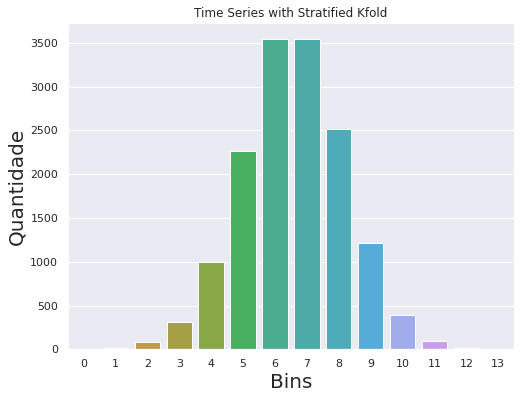

In [112]:
ax = sns.countplot(y)

ax.figure.set_size_inches(8,6)
ax.set_title('Time Series with Stratified Kfold')
ax.set_xlabel('Bins', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20);

Escolhendo um dos folds para fazer o plot:

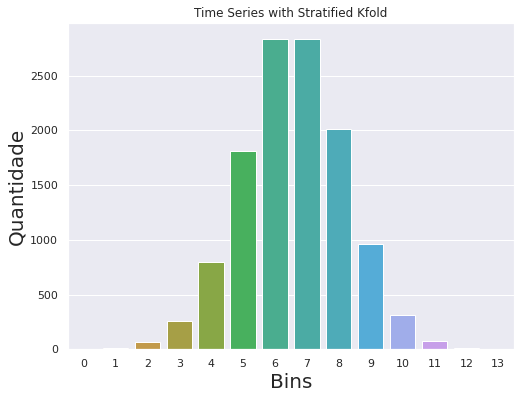

In [113]:
ax = sns.countplot(y.loc[list(s_kf.split(X, y))[0][0]])

ax.figure.set_size_inches(8,6)
ax.set_title('Time Series with Stratified Kfold')
ax.set_xlabel('Bins', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=20);

Mais uma vez, podemos visualizar que o Stratified Kfolf toma cuidado para separar os grupos de treino e validação na mesma proporção que o DataSet original